In [1]:
using Distributions, Plots, Statistics, Images, CSV, DataFrames

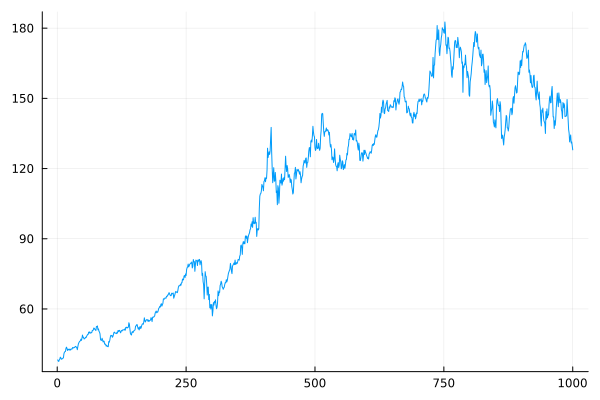

In [6]:
s = 1
T = 1000
p = .02
burnin = 20
# f(x) = sin(x^2/600 + x/10) + cos(x/10)
df = DataFrame(CSV.File(open("./AAPL.csv"); buffer_in_memory=true))
N = size(df)[1]
inds = (N - 1000):N
v = df[inds,:].Open
f(x) = v[x]
plot(s:T, x -> f(x), label = false)

In [78]:
longs = []
shorts = []
period = 50
for i in s:period:(T - period)
    npmm_max = argmax(f.(i:(i + period))) + i - 1
    npmm_min = argmin(f.(i:(i + period))) + i - 1
    push!(shorts, npmm_max)
    push!(longs, npmm_min)
end

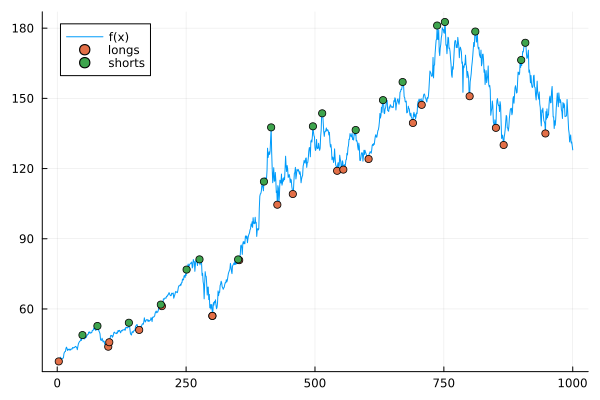

In [79]:
plot(s:T, x -> f(x), label = "f(x)")
scatter!(longs .|> Int64, x -> f(x |> Int64), label = "longs")
scatter!(shorts .|> Int64, x -> f(x |> Int64), label = "shorts")

In [80]:
trades = []
push!(trades, (longs[1], -1))
i = 1
j = 1
flag = 1
while i < length(longs) || j < length(shorts)
    if flag == 1
        if longs[i] < shorts[j]
            push!(trades, (shorts[j], 1))
            flag = 0
        else
            j += 1
        end
    else
        if shorts[j] < longs[i]
            push!(trades, (longs[i], -1))
            flag = 1
        else
            i += 1
        end
    end
end

In [81]:
unzip(x) = (first.(x), last.(x))

unzip (generic function with 1 method)

In [82]:
inds, flag = unzip(trades)
vals = f.(inds)
profit = sum(vals .* flag)

145.1099967956543

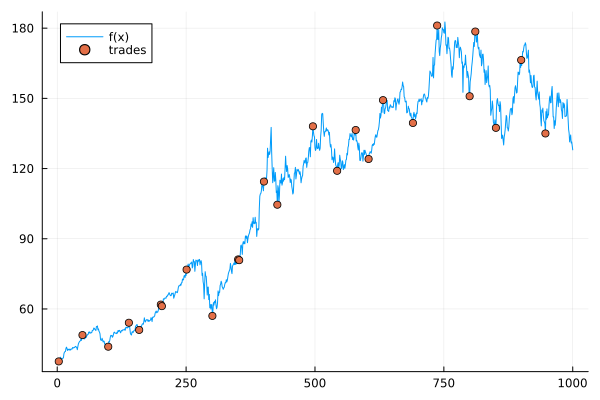

In [83]:
plot(s:T, x -> f(x), label = "f(x)")
scatter!(inds .|> Int64, x -> f(x |> Int64), label = "trades")

In [104]:
get_window(inds, k) = (k - 1 >= 1 ? inds[k - 1] : s):(k + 1 <= length(inds) ? inds[k + 1] : T)
windows = (k -> get_window(inds, k)).(1:length(inds))
k = 10
rtrade(k) = ((profit .+ (f(inds[k]) * flag[k] * -1)) .+ (f.(windows[k]) * flag[k]))
prtrade(k) = f.(windows[k]) .- f(inds[k])

prtrade (generic function with 1 method)

In [105]:
windows[1], windows[3]

(1:49, 49:139)

In [123]:
normalize(x) = (x .- minimum(x)) ./ (maximum(x) - minimum(x))

normalize (generic function with 1 method)

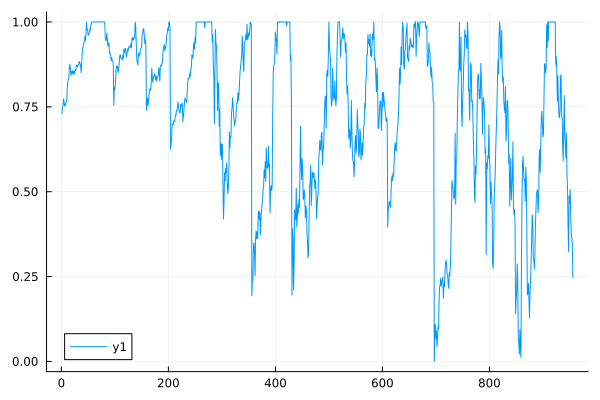

In [138]:
plot(reduce(vcat, rtrade.(2:2:25)) ./ profit .|> (x -> clamp(x, 0, 1)) |> normalize)